# EDA & Data Preprocessing on Google App Store Rating Dataset

# 1. Import required libraries and read the dataset.

In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv('Apps_data+(1).csv')

In [3]:
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

2.Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
# Display the first few samples of the data
print("First few samples of the dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Display information about the dataset, including data types and missing values
print("\nInformation about the dataset:")
print(df.info())

First few samples of the dataset:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018              

3.Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [5]:
# Display summary statistics of the dataset
print("Summary statistics of the dataset:")
print(df.describe())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Summary statistics of the dataset:
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

Missing values in each column:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


4.Check if there are any duplicate records in the dataset? if any drop them

In [6]:
# Check for duplicate records
duplicates = df.duplicated()

# Display the number of duplicate records
print("Number of duplicate records:", duplicates.sum())

# Drop duplicate records
dataset_no_duplicates = df.drop_duplicates()

# Display the shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicates:", dataset_no_duplicates.shape)


Number of duplicate records: 483
Shape of the dataset after removing duplicates: (10358, 13)


5.Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [7]:
# Check unique categories in the 'Category' column
unique_categories = df['Category'].unique()

# Display the unique categories
print("Unique categories in the 'Category' column:")
print(unique_categories)

Unique categories in the 'Category' column:
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [8]:
# Specify the list of valid categories
valid_categories = ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']

In [9]:
# Filter out rows with invalid categories
dataset_valid_categories = df[df['Category'].isin(valid_categories)]


In [10]:
# Display the shape of the dataset after filtering invalid categories
print("\nShape of the dataset after filtering invalid categories:", dataset_valid_categories.shape)


Shape of the dataset after filtering invalid categories: (0, 13)


6.Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low) (3 marks)

In [11]:
# Check for missing values in the 'Rating' column
missing_values = df['Rating'].isnull().sum()
print("Number of missing values in the 'Rating' column:", missing_values)

# Drop rows with missing values in the 'Rating' column
dataset_no_missing_ratings = df.dropna(subset=['Rating'])

# Create a new column 'Rating_category' based on the specified criteria
dataset_no_missing_ratings['Rating_category'] = np.where(dataset_no_missing_ratings['Rating'] > 3.5, 'High', 'Low')

# Display the updated dataset with the new 'Rating_category' column
print("\nUpdated dataset with the 'Rating_category' column:")
print(dataset_no_missing_ratings.head())


Number of missing values in the 'Rating' column: 1474

Updated dataset with the 'Rating_category' column:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Cur

C:\Users\abhis\AppData\Local\Temp\ipykernel_10060\950728667.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_missing_ratings['Rating_category'] = np.where(dataset_no_missing_ratings['Rating'] > 3.5, 'High', 'Low')


7.Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

Distribution of 'Rating_category':
Rating_category
High    8471
Low      896
Name: count, dtype: int64


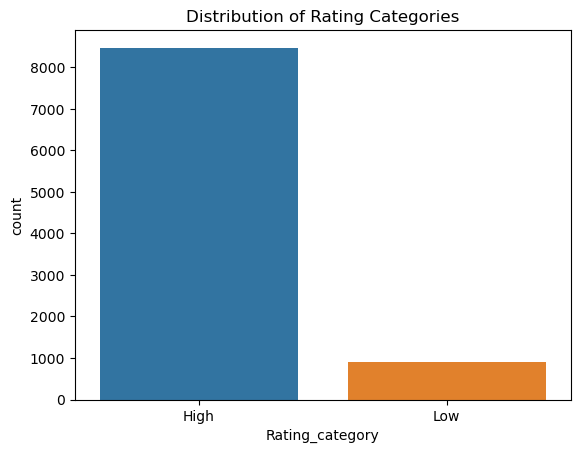

In [12]:
# Check the distribution of the 'Rating_category' column
rating_category_distribution = dataset_no_missing_ratings['Rating_category'].value_counts()

# Display the distribution
print("Distribution of 'Rating_category':")
print(rating_category_distribution)

# Plot a bar chart for better visualization (optional)
sns.countplot(x='Rating_category', data=dataset_no_missing_ratings)
plt.title('Distribution of Rating Categories')
plt.show()


8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation) (2 marks) 

C:\Users\abhis\AppData\Local\Temp\ipykernel_10060\2563876244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_missing_ratings['Reviews'] = pd.to_numeric(dataset_no_missing_ratings['Reviews'], errors='coerce')


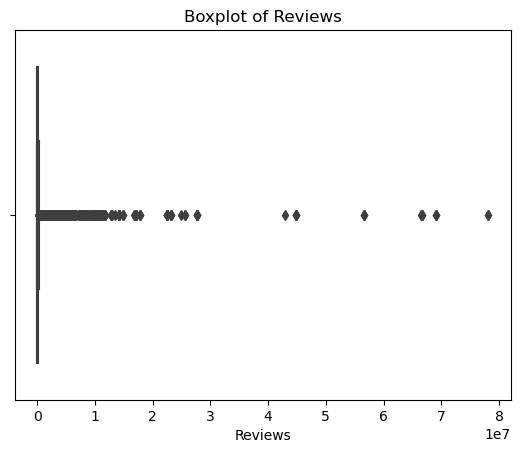

C:\Users\abhis\AppData\Local\Temp\ipykernel_10060\2563876244.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_missing_ratings['Reviews_log'] = np.log1p(dataset_no_missing_ratings['Reviews'])


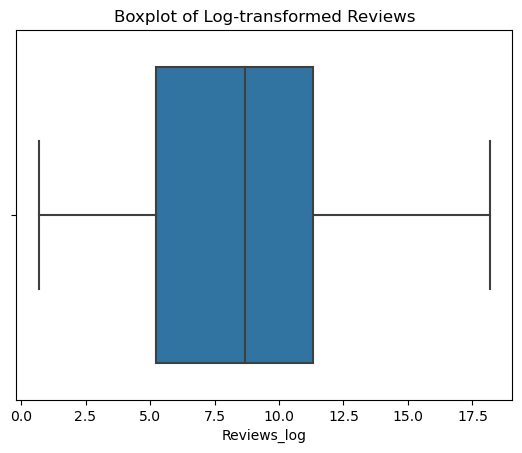

In [13]:
# Convert the 'Reviews' column to numeric data type
dataset_no_missing_ratings['Reviews'] = pd.to_numeric(dataset_no_missing_ratings['Reviews'], errors='coerce')

# Check for the presence of outliers in the 'Reviews' column
sns.boxplot(x=dataset_no_missing_ratings['Reviews'])
plt.title('Boxplot of Reviews')
plt.show()

# Handle outliers using log transformation
dataset_no_missing_ratings['Reviews_log'] = np.log1p(dataset_no_missing_ratings['Reviews'])

# Check the distribution of the log-transformed 'Reviews' column
sns.boxplot(x=dataset_no_missing_ratings['Reviews_log'])
plt.title('Boxplot of Log-transformed Reviews')
plt.show()


9.The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device') (3 marks)

In [14]:
# Replace 'M' with 1 million and 'K' with 1 thousand in the 'Size' column
dataset_no_missing_ratings['Size'] = dataset_no_missing_ratings['Size'].replace({'M': 'e6', 'K': 'e3'}, regex=True)

# Convert the 'Size' column to numeric data type
dataset_no_missing_ratings['Size'] = pd.to_numeric(dataset_no_missing_ratings['Size'], errors='coerce')

# Drop entries where 'Size' is 'Varies with device'
dataset_no_missing_ratings = dataset_no_missing_ratings[dataset_no_missing_ratings['Size'].notnull()]

# Display the updated dataset
print("Updated dataset after treating the 'Size' column:")
print(dataset_no_missing_ratings.head())


Updated dataset after treating the 'Size' column:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews        Size     Installs  Type Price Content Rating  \
0     159.0  19000000.0      10,000+  Free     0       Everyone   
1     967.0  14000000.0     500,000+  Free     0       Everyone   
2   87510.0   8700000.0   5,000,000+  Free     0       Everyone   
3  215644.0  25000000.0  50,000,000+  Free     0           Teen   
4     967.0   2800000.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver

C:\Users\abhis\AppData\Local\Temp\ipykernel_10060\154685743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_missing_ratings['Size'] = dataset_no_missing_ratings['Size'].replace({'M': 'e6', 'K': 'e3'}, regex=True)
C:\Users\abhis\AppData\Local\Temp\ipykernel_10060\154685743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_missing_ratings['Size'] = pd.to_numeric(dataset_no_missing_ratings['Size'], errors='coerce')


10.Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [15]:
# Remove unwanted characters from the 'Installs' column
dataset_no_missing_ratings['Installs'] = dataset_no_missing_ratings['Installs'].str.replace('[^\d]', '', regex=True)

# Convert the 'Installs' column to numeric data type
dataset_no_missing_ratings['Installs'] = pd.to_numeric(dataset_no_missing_ratings['Installs'], errors='coerce')

# Display the updated dataset
print("Updated dataset after treating the 'Installs' column:")
print(dataset_no_missing_ratings.head())


Updated dataset after treating the 'Installs' column:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews        Size  Installs  Type Price Content Rating  \
0     159.0  19000000.0     10000  Free     0       Everyone   
1     967.0  14000000.0    500000  Free     0       Everyone   
2   87510.0   8700000.0   5000000  Free     0       Everyone   
3  215644.0  25000000.0  50000000  Free     0           Teen   
4     967.0   2800000.0    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0         

11.Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [16]:
# Remove unwanted characters from the 'Price' column
dataset_no_missing_ratings['Price'] = dataset_no_missing_ratings['Price'].str.replace('[^\d.]', '', regex=True)

# Convert the 'Price' column to numeric data type
dataset_no_missing_ratings['Price'] = pd.to_numeric(dataset_no_missing_ratings['Price'], errors='coerce')

# Display the updated dataset
print("Updated dataset after treating the 'Price' column:")
print(dataset_no_missing_ratings.head())


Updated dataset after treating the 'Price' column:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews        Size  Installs  Type  Price Content Rating  \
0     159.0  19000000.0     10000  Free    0.0       Everyone   
1     967.0  14000000.0    500000  Free    0.0       Everyone   
2   87510.0   8700000.0   5000000  Free    0.0       Everyone   
3  215644.0  25000000.0  50000000  Free    0.0           Teen   
4     967.0   2800000.0    100000  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0      

12.Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [17]:
# List of columns to drop
columns_to_drop = ['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

# Drop the specified columns
dataset_cleaned = dataset_no_missing_ratings.drop(columns=columns_to_drop)

# Display the updated dataset
print("Updated dataset after dropping redundant columns:")
print(dataset_cleaned.head())


Updated dataset after dropping redundant columns:
         Category   Reviews        Size  Installs  Type  Price Content Rating  \
0  ART_AND_DESIGN     159.0  19000000.0     10000  Free    0.0       Everyone   
1  ART_AND_DESIGN     967.0  14000000.0    500000  Free    0.0       Everyone   
2  ART_AND_DESIGN   87510.0   8700000.0   5000000  Free    0.0       Everyone   
3  ART_AND_DESIGN  215644.0  25000000.0  50000000  Free    0.0           Teen   
4  ART_AND_DESIGN     967.0   2800000.0    100000  Free    0.0       Everyone   

  Rating_category  Reviews_log  
0            High     5.075174  
1            High     6.875232  
2            High    11.379520  
3            High    12.281389  
4            High     6.875232  


13.Encode the categorical columns

In [18]:
# Identify categorical columns
categorical_columns = dataset_cleaned.select_dtypes(include=['object']).columns

# Perform one-hot encoding
dataset_encoded = pd.get_dummies(dataset_cleaned, columns=categorical_columns)

# Display the updated dataset after encoding
print("Updated dataset after one-hot encoding:")
print(dataset_encoded.head())


Updated dataset after one-hot encoding:
    Reviews        Size  Installs  Price  Reviews_log  \
0     159.0  19000000.0     10000    0.0     5.075174   
1     967.0  14000000.0    500000    0.0     6.875232   
2   87510.0   8700000.0   5000000    0.0    11.379520   
3  215644.0  25000000.0  50000000    0.0    12.281389   
4     967.0   2800000.0    100000    0.0     6.875232   

   Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0                     True                       False            False   
1                     True                       False            False   
2                     True                       False            False   
3                     True                       False            False   
4                     True                       False            False   

   Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  Type_Free  Type_Paid  \
0                         False              False  ...       True      False   
1   

14.Segregate the target and independent features (Hint: Use Rating_category as the target)

In [19]:
# Display the columns in the dataset_encoded DataFrame
print("Columns in the dataset_encoded DataFrame:")
print(dataset_encoded.columns)



Columns in the dataset_encoded DataFrame:
Index(['Reviews', 'Size', 'Installs', 'Price', 'Reviews_log',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Free', 'Typ

In [20]:
# Assuming 'Rating_category_High' is the correct column name
# If it's 'Rating_category_Low', replace 'Rating_category_High' with 'Rating_category_Low'
X = dataset_encoded.drop(['Rating_category_High', 'Rating_category_Low'], axis=1)
y = dataset_encoded['Rating_category_High']  # or 'Rating_category_Low'

# Display the first few rows of the independent features (X) and target variable (y)
print("\nIndependent features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())



Independent features (X):
    Reviews        Size  Installs  Price  Reviews_log  \
0     159.0  19000000.0     10000    0.0     5.075174   
1     967.0  14000000.0    500000    0.0     6.875232   
2   87510.0   8700000.0   5000000    0.0    11.379520   
3  215644.0  25000000.0  50000000    0.0    12.281389   
4     967.0   2800000.0    100000    0.0     6.875232   

   Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0                     True                       False            False   
1                     True                       False            False   
2                     True                       False            False   
3                     True                       False            False   
4                     True                       False            False   

   Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  \
0                         False              False  ...   
1                         False              False  ...   
2 

15.Split the dataset into train and test.

In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5976, 46)
Shape of X_test: (1495, 46)
Shape of y_train: (5976,)
Shape of y_test: (1495,)


16.Standardize the data, so that the values are within a particular range.

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

In [23]:
# Display the first few rows of the scaled training set
print("Scaled Training Set (X_train_scaled):")
print(X_train_scaled[:5, :])  # Displaying the first 5 rows

# Display the first few rows of the scaled test set
print("\nScaled Test Set (X_test_scaled):")
print(X_test_scaled[:5, :])  # Displaying the first 5 rows


Scaled Training Set (X_train_scaled):
[[-0.15801634 -0.37289252 -0.17193651 -0.06076785 -1.58951547 -0.08903448
  -0.09092443 -0.06610407 -0.14253971  5.44482817 -0.07337288 -0.16100542
  -0.14853483 -0.1172197  -0.11499923 -0.07103104 -0.521306   -0.18799743
  -0.10404537 -0.38773298 -0.17773534 -0.08903448 -0.05794789 -0.19688165
  -0.10648303 -0.20052151 -0.15769302 -0.07675457 -0.19224962 -0.18170422
  -0.17521484 -0.15769302 -0.15260299 -0.18608073 -0.28502204 -0.14556558
  -0.12295551 -0.07893038  0.27914526 -0.27914526 -0.01829711  0.51611045
  -0.21583544 -0.22460684 -0.36454217 -0.01293692]
 [-0.15006269 -0.58683768 -0.15149037 -0.06076785  0.50133788 -0.08903448
  -0.09092443 -0.06610407 -0.14253971 -0.18366052 -0.07337288 -0.16100542
  -0.14853483 -0.1172197  -0.11499923 -0.07103104 -0.521306   -0.18799743
  -0.10404537 -0.38773298 -0.17773534 -0.08903448 -0.05794789 -0.19688165
  -0.10648303 -0.20052151 -0.15769302 -0.07675457 -0.19224962 -0.18170422
  -0.17521484 -0.157693

In [24]:
# Create DataFrames for the scaled training and test sets
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training set
print("Scaled Training Set (X_train_scaled):")
print(df_train_scaled.head())

# Display the first few rows of the scaled test set
print("\nScaled Test Set (X_test_scaled):")
print(df_test_scaled.head())

Scaled Training Set (X_train_scaled):
    Reviews      Size  Installs     Price  Reviews_log  \
0 -0.158016 -0.372893 -0.171937 -0.060768    -1.589515   
1 -0.150063 -0.586838 -0.151490 -0.060768     0.501338   
2 -0.158012 -0.116158 -0.171836 -0.060768    -1.383093   
3 -0.158009 -0.116158 -0.171918 -0.060768    -1.279360   
4 -0.137884  0.054998 -0.069698 -0.060768     0.752797   

   Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
0                -0.089034                   -0.090924        -0.066104   
1                -0.089034                   -0.090924        -0.066104   
2                -0.089034                   -0.090924        -0.066104   
3                -0.089034                   -0.090924        -0.066104   
4                -0.089034                   -0.090924        -0.066104   

   Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  \
0                      -0.14254           5.444828  ...   
1                      -0.14254          -0.